# Author : NISHU KUMARI

# "Data Science & Business Analytics Intern"


# The Sparks Foundation 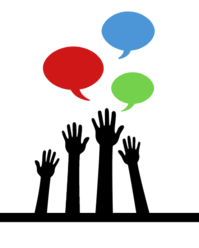
  
                                                                

# GRIP : MARCH-2022




### BEGINNER LEVEL TASK


### TASK-2 : Prediction using Unsupervised Machine Learning

In the second task TSF(The Sparks Foundation) provides hands on practice to interns to get a basic idea of Unsupervised ML algorithms. In this K-means clustering task, I have tried to predict the optimum number of clusters and represent it visually from the inbuilt ‘Iris’ dataset. At last we will use different performance metrics to see how good our model predicts from unseen data.

#### Dataset Link : https://bit.ly/3kXTdox

## Importing Libraries

In [174]:
# Importing all libraries required in this notebook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

## Loading the Data

In [175]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)  # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [176]:
iris_df.sample(10)  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
85,6.0,3.4,4.5,1.6
81,5.5,2.4,3.7,1.0
29,4.7,3.2,1.6,0.2
125,7.2,3.2,6.0,1.8
67,5.8,2.7,4.1,1.0
48,5.3,3.7,1.5,0.2
18,5.7,3.8,1.7,0.3
140,6.7,3.1,5.6,2.4
45,4.8,3.0,1.4,0.3
78,6.0,2.9,4.5,1.5


In [177]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [178]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [179]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [180]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [181]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])
print(type(x))

<class 'pandas.core.frame.DataFrame'>


## Finding the optimal K value using elbow method

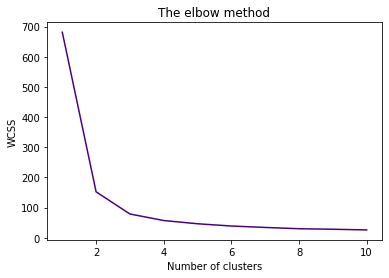

In [182]:
# Finding the optimum number of clusters for k-means classification

X = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'

plt.plot(range(1, 11), wcss,color='indigo')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. It is clearly evident that the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration after 3 number of clusster which suggests us that 3 clusters are optimal for this data.

## Creating Kmeans cluster

In [183]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
model = kmeans.fit(x)
y_pred = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print(type(y_kmeans))


<class 'numpy.ndarray'>


In [184]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [185]:
print(model.cluster_centers_.shape)

(3, 4)


## Data Visualization

### Plotting Box Plot

<AxesSubplot:ylabel='petal width (cm)'>

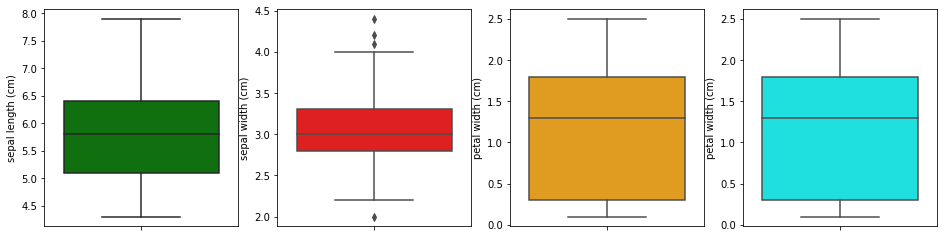

In [186]:
# Box Plot
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=iris_df,y='sepal length (cm)',color='green')
plt.subplot(1,4,2)
sns.boxplot(data=iris_df,y='sepal width (cm)',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=iris_df,y='petal width (cm)',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=iris_df,y='petal width (cm)',color='cyan')

### Plotting Count Plot

<AxesSubplot:xlabel='sepal width (cm)', ylabel='Count'>

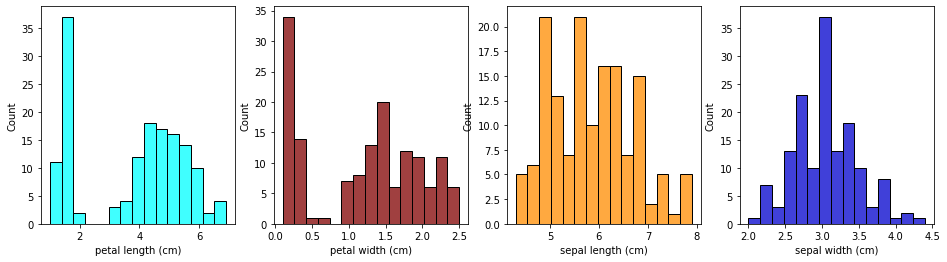

In [187]:
#Count Plot
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.histplot(data=iris_df,x='petal length (cm)', bins=15,color='cyan')
plt.subplot(1,4,2)
sns.histplot(data=iris_df,x='petal width (cm)', bins=15,color='maroon')
plt.subplot(1,4,3)
sns.histplot(data=iris_df,x='sepal length (cm)', bins=15,color='darkorange')
plt.subplot(1,4,4)
sns.histplot(data=iris_df,x='sepal width (cm)', bins=15,color='mediumblue')

### Plotting Scatter Plot

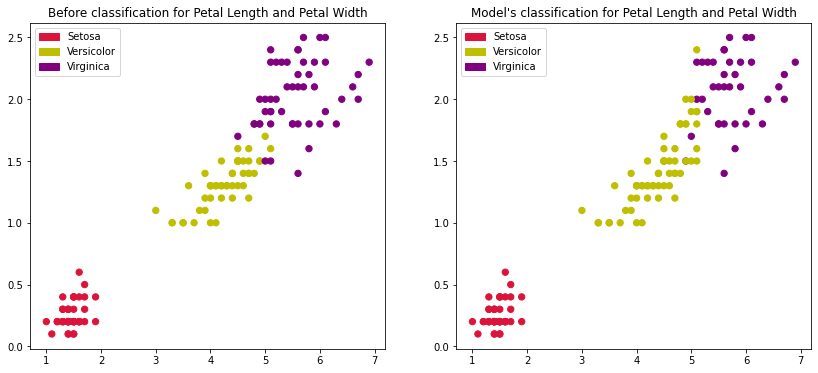

In [188]:
# Scatter Plot
plt.figure(figsize=(14,6))
import matplotlib.patches as mpatches
colors = np.array(['crimson', 'y', 'purple'])
red_patch = mpatches.Patch(color='crimson', label='Setosa')
green_patch = mpatches.Patch(color='y', label='Versicolor')
blue_patch = mpatches.Patch(color='purple', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'],s=40, c=colors[y['Target']])
plt.title('Before classification for Petal Length and Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'],s=40, c=colors[y_pred])
plt.title("Model's classification for Petal Length and Petal Width")
plt.legend(handles=[red_patch, green_patch, blue_patch])


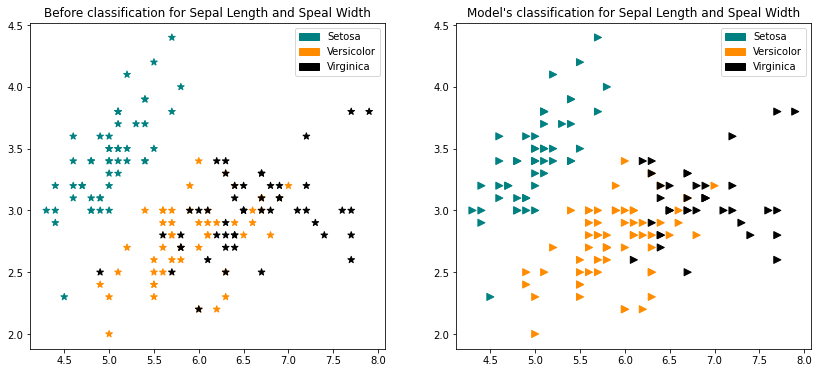

In [189]:
# Scatter Plot
plt.figure(figsize=(14,6))
import matplotlib.patches as mpatches
colors = np.array(['teal', 'darkorange', 'black'])
red_patch = mpatches.Patch(color='teal', label='Setosa')
green_patch = mpatches.Patch(color='darkorange', label='Versicolor')
blue_patch = mpatches.Patch(color='black', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'],s=50, c=colors[y['Target']],marker='*')
plt.title('Before classification for Sepal Length and Speal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Sepal Length'], x['Sepal Width'],s=50, c=colors[y_pred],marker='>',)
plt.title("Model's classification for Sepal Length and Speal Width")
plt.legend(handles=[red_patch, green_patch, blue_patch])


### Plotting Heat Map

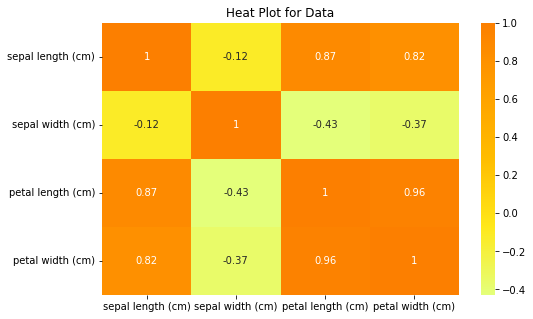

In [190]:
# Heat Map Plot
plt.figure(figsize=(8,5))
sns.heatmap(iris_df.corr(), annot=True,cmap='Wistia')
plt.title('Heat Plot for Data')
plt.show()

In [191]:
# Printing the Score
import sklearn.metrics as sm
Score=sm.accuracy_score(y_pred, y.values)
Score

0.8933333333333333

In [192]:
#Printing Confusion Matrix
sm.confusion_matrix(y_pred, y.values)


array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)

The acccuracy_score is a classification performance metric which tells about how robust the prediction has been made. Another metric used in

## Summary
The unsupervised prediction model is built successfully and I was able to make beautiful clusters out of the unknown data.

# Thank You!!! :)